# Plots for the process management problem: 

## Define problem instance

In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk

#random.seed(13)

# Define the number of items
n_items = 6

# Define ranges
duration_range = [1, 7]
values_range = [5, 15]
max_duration_percentage = 0.7

# Fill the weights and values 
duration = [random.randint(duration_range[0], duration_range[1]) for _ in range(n_items)]
values  = [random.randint(values_range[0], values_range[1]) for _ in range(n_items)]

# Compute the maximum allowed weight
max_duration = int(max_duration_percentage * sum(duration))


# Print the instance
print("-" * 20)
print("Instance Details:")
print("-" * 20)
print(f"Duration                 : {duration}")
print(f"Values                   : {values}")
print(f"Total duration           : {sum(duration)}")
print(f"Maximum allowed duration : {max_duration}")

--------------------
Instance Details:
--------------------
Duration                 : [7, 4, 3, 3, 3, 1]
Values                   : [14, 12, 14, 10, 12, 12]
Total duration           : 21
Maximum allowed duration : 14


Reference Solution (Selected Processes are **Bolded**):

Duration: [3, **3**, **6**, **6**, 7, **7**]

Values: [7, **15**, **8**, **15**, 7, **8**]

Total selected Duration: 22

Total selected values: 46

# 2D Plotting of cost function: 


### Build the cost hamiltonians for the Process Management problem:

In [2]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
from qibo.symbols import Z, X
from qibo.hamiltonians import SymbolicHamiltonian

nqubits= 6

def arctan_taylor(x, terms=100):
    result = 0
    sign = 1
    for n in range(1, 2*terms, 2):
        term = sign * (x ** n) / n
        result += term
        sign *= -1
    return result

def build_cost_hamiltonian(values: list[int], duration: list[int], max_duration: int) -> SymbolicHamiltonian:
    """This function should be filled to build the problem cost hamiltonian.

    Args:
        values (list[int]): the list of values.
        duration (list[int]): the list of durations. 
        max_duration (int): the maximum value of the allowed duration.
        
    """
    
    #args = []

    #for i in range(max_duration+1): 
    #    args.append((i - (sum ( duration[i]*(1-Z(i))/2 for i in range(nqubits))))**2)

    #args = np.array(args)    
    #summation = np.sum(args)

    cost_hamiltonian = - sum ( values[i] *(1-Z(i))/2 for i in range(nqubits)) + 1/3 *(4/5*max_duration - sum ( duration[i]*(1-Z(i))/2 for i in range(nqubits)))**2

# Cost function without constraint: 
# - sum (values[i]*(1-Z(i))/2 for i in range(nqubits))

# Cost function 1: 
# - (1 - sum ( duration[i]*(1-Z(i))/2 for i in range(nqubits)) / max_duration) *  sum ( values[i]*(1-Z(i))/2 for i in range(nqubits))

# Cost function 2: 
# - (((1 - sum ( duration[i]*(1-Z(i))/2 for i in range(nqubits)))/ max_duration)**2)**1/2*(1 - sum ( duration[i]*(1-Z(i))/2 for i in range(nqubits)) / max_duration) *  sum ( values[i]*(1-Z(i))/2 for i in range(nqubits))

# Cost function 3: 
# - (1 - (sum ( duration[i]*(1-Z(i))/2 for i in range(nqubits)))**2 / max_duration**2) *  sum ( values[i]*(1-Z(i))/2 for i in range(nqubits))


    return SymbolicHamiltonian(cost_hamiltonian)

### Compute the number of qubits required to execute the cost hamiltonian

In [3]:
# define the number of qubits:

nqubits= 6

### Diagonalize the cost hamiltonian and examine its eigenvalues and eigenvectors. 
- Show that the ground state eigenvector does actually correspond to the ground state energy of the problem. (Note: the ground state could be degenerate)

In [4]:
import numpy as np
from qibo import set_backend

# set the backend used for the calculation 
set_backend("numpy", platform=None)


# create the cost Hamiltonian for the given graph
cost_hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)

ham_matrix = cost_hamiltonian.matrix

eig_val, eig_vec = np.linalg.eig(ham_matrix)
eig_vec = ["{0:0{bits}b}".format(i.argmax(), bits=nqubits) for i in eig_vec]

vec = zip(eig_val, eig_vec)
diagonalized_solution = sorted(vec, key=lambda x: x[0])

[Qibo 0.2.7|INFO|2024-05-04 22:26:03]: Using numpy backend on /CPU:0


[Qibo 0.2.7|WARNING|2024-05-04 22:26:03]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.



[((-57.38666666666667+0j), '011111'), ((-50.786666666666676+0j), '101111'), ((-49.986666666666665+0j), '011011'), ((-49.38666666666667+0j), '101011'), ((-48.58666666666667+0j), '111011'), ((-47.986666666666665+0j), '011101'), ((-47.519999999999996+0j), '001111'), ((-47.38666666666667+0j), '101101'), ((-47.18666666666667+0j), '111001'), ((-46.92+0j), '011110'), ((-46.58666666666667+0j), '111101'), ((-45.986666666666665+0j), '010111'), ((-45.38666666666667+0j), '100111'), ((-45.18666666666667+0j), '110011'), ((-44.58666666666667+0j), '110111'), ((-43.18666666666667+0j), '110101'), ((-42.32000000000001+0j), '101110'), ((-41.98666666666668+0j), '111111'), ((-40.786666666666676+0j), '111010'), ((-39.986666666666665+0j), '101001'), ((-38.92+0j), '101010'), ((-38.786666666666676+0j), '111100'), ((-37.986666666666665+0j), '100011'), ((-37.78666666666667+0j), '110001'), ((-37.519999999999996+0j), '011010'), ((-37.38666666666667+0j), '111000'), ((-36.92+0j), '101100'), ((-36.786666666666676+0j)

In [5]:
# We define a funciton to convert binary numbers into states (represented by numpy arrays): 
def binary_to_array(binary_str):

    # Convert binary string to a list of integers
    binary_list = [int(bit) for bit in binary_str]

    # Convert list to NumPy array
    array = np.array(binary_list)
    return array


diagonalized = []
configuration = []
duration_tot = []

# Isolating the values in a more convenient way: 
for i in range(len(diagonalized_solution)): 
    diagonalized.append(np.real(diagonalized_solution[i][0])) 
    configuration.append(np.real(diagonalized_solution[i][1])) 

    state = binary_to_array(str(np.real(diagonalized_solution[i][1])))
    duration_tot.append(np.dot(state, duration))
    

# Converting the lists in numpy arrays: 
diagonalized = np.array(diagonalized)
configuration = np.array(configuration)


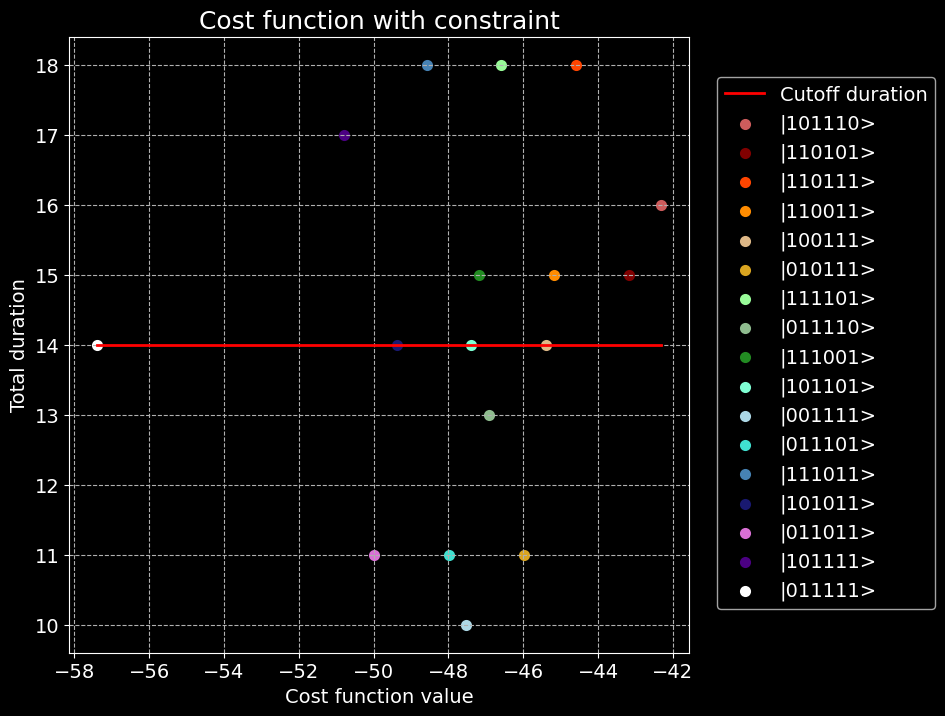

In [6]:
fig = plt.figure()
fig.set_size_inches(8,8)
plt.rc('font', size=14)
plt.gca().set_facecolor('#000000')
fig.set_facecolor('#000000')


# Plot the 16 lowest eigenvalues: 
plt.plot(np.linspace(diagonalized[16], diagonalized[0],2),np.ones(2)*max_duration, color = "red",label=rf"Cutoff duration", linewidth = 2)
plt.scatter(diagonalized[16],duration_tot[16], color = "indianred",label=rf"|{configuration[16]}>", linewidth = 2)
plt.scatter(diagonalized[15],duration_tot[15], color = "maroon",label=rf"|{configuration[15]}>", linewidth = 2)
plt.scatter(diagonalized[14],duration_tot[14], color = "orangered",label=rf"|{configuration[14]}>", linewidth = 2)
plt.scatter(diagonalized[13],duration_tot[13], color = "darkorange",label=rf"|{configuration[13]}>", linewidth = 2)
plt.scatter(diagonalized[12],duration_tot[12], color = "burlywood",label=rf"|{configuration[12]}>", linewidth = 2)
plt.scatter(diagonalized[11],duration_tot[11], color = "goldenrod",label=rf"|{configuration[11]}>", linewidth = 2)
plt.scatter(diagonalized[10],duration_tot[10], color = "palegreen",label=rf"|{configuration[10]}>", linewidth = 2)
plt.scatter(diagonalized[9],duration_tot[9], color = "darkseagreen",label=rf"|{configuration[9]}>", linewidth = 2)
plt.scatter(diagonalized[8],duration_tot[8], color = "forestgreen",label=rf"|{configuration[8]}>", linewidth = 2)
plt.scatter(diagonalized[7],duration_tot[7], color = "aquamarine",label=rf"|{configuration[7]}>", linewidth = 2)
plt.scatter(diagonalized[6],duration_tot[6], color = "lightblue",label=rf"|{configuration[6]}>", linewidth = 2)
plt.scatter(diagonalized[5],duration_tot[5], color = "turquoise",label=rf"|{configuration[5]}>", linewidth = 2)
plt.scatter(diagonalized[4],duration_tot[4], color = "steelblue",label=rf"|{configuration[4]}>", linewidth = 2)
plt.scatter(diagonalized[3],duration_tot[3], color = "midnightblue",label=rf"|{configuration[3]}>", linewidth = 2)
plt.scatter(diagonalized[2],duration_tot[2], color = "orchid",label=rf"|{configuration[2]}>", linewidth = 2)
plt.scatter(diagonalized[1],duration_tot[1], color = "indigo",label=rf"|{configuration[1]}>", linewidth = 2)
plt.scatter(diagonalized[0],duration_tot[0], color = "white",label=rf"|{configuration[0]}>", linewidth = 2)


legend = plt.legend(bbox_to_anchor=(1.03,0.95), labelcolor = "white")
legend.get_frame().set_facecolor('#000000')

plt.ylabel(f"Total duration", color='white')
plt.xlabel(f"Cost function value", color='white')
plt.title(rf"Cost function with constraint",fontsize=18, color='white')
plt.grid(linestyle='--')

ax = plt.gca()
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')

ax.tick_params(axis='both', colors='white')

#mplcyberpunk.make_lines_glow()

Save = "Cost_Function_Final"
plt.savefig(Save + ".pdf", dpi=300, bbox_inches='tight')
plt.savefig(Save + ".png", dpi=300, bbox_inches='tight')
plt.show()

# Iteration over many runs: 

### Here we run a for loop over the whole calculation. Since the code is identical to the problem notebook, there are no extensive comments present. 

In [88]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from qibo.symbols import Z, X
from qibo.hamiltonians import SymbolicHamiltonian
from qibo import set_backend
from qibo import models
from qibo.models.evolution import AdiabaticEvolution
from qibo.hamiltonians.hamiltonians import Hamiltonian
set_backend("numpy", platform=None)

comp_12 = []
comp_23 = [] 
comp_13 = []

ediff_12 = []
ediff_23 = [] 
ediff_13 = []

Repetitions=150

n_items = 6
nqubits= 6
duration_range = [1, 7]
values_range = [5, 15]
max_duration_percentage = 0.7

def build_cost_hamiltonian(values: list[int], duration: list[int], max_duration: int) -> SymbolicHamiltonian:
    cost_hamiltonian = - sum ( values[i] *(1-Z(i))/2 for i in range(nqubits)) + 1/3 *(4/5*max_duration - sum ( duration[i]*(1-Z(i))/2 for i in range(nqubits)))**2
    return SymbolicHamiltonian(cost_hamiltonian)

def build_mixer_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    mixing_hamiltonian = sum((X(i)) for i in range(nqubits)) 
    return SymbolicHamiltonian(mixing_hamiltonian)

def build_initial_hamiltonian(nqubits: int) -> SymbolicHamiltonian:
    mixing_hamiltonian = sum((X(i)) for i in range(nqubits)) 
    return SymbolicHamiltonian(mixing_hamiltonian)

def s(t): return t

for i in range(Repetitions): 
    duration = [random.randint(duration_range[0], duration_range[1]) for _ in range(n_items)]
    values  = [random.randint(values_range[0], values_range[1]) for _ in range(n_items)]
    max_duration = int(max_duration_percentage * sum(duration))

    ### SOLUTION 1: 

    cost_hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)
    ham_matrix = cost_hamiltonian.matrix
    eig_val, eig_vec = np.linalg.eig(ham_matrix)
    eig_vec = ["{0:0{bits}b}".format(i.argmax(), bits=nqubits) for i in eig_vec]
    vec = zip(eig_val, eig_vec)
    diagonalized_solution = sorted(vec, key=lambda x: x[0])

    sol_1 = str(np.real(diagonalized_solution[0][1]))
    energy_1 = np.real(diagonalized_solution[0][0])

    ### SOLUTION 2: 

    hamiltonian = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)
    mixer_hamiltonian = build_mixer_hamiltonian(nqubits)
    qaoa = models.QAOA(hamiltonian=hamiltonian, mixer=mixer_hamiltonian)
    n_layers = 4
    initial_parameters = 0.01 * np.random.random(n_layers * 2)
    method = "Powell"
    best_energy, final_parameters, _ = qaoa.minimize(initial_parameters, method=method)
    qaoa.set_parameters(final_parameters)
    quantum_state = qaoa.execute(None)
    probabilities = (np.abs(quantum_state) ** 2)
    probabilities = zip(probabilities, [i for i in range(len(probabilities))])
    probabilities = sorted(probabilities, key=lambda x: x[0], reverse=True)
    probabilities = [("{:.2f} %".format(round(p*100, 4)), "{0:0{bits}b}".format(s, bits=nqubits)) for p, s in probabilities]

    sol_2 = probabilities[0][1]
    energy_2 = best_energy

    ### SOLUTION 3: 

    H0 = build_initial_hamiltonian(nqubits=nqubits)
    H1 = build_cost_hamiltonian(values=values, duration=duration, max_duration=max_duration)
    H1_dense = Hamiltonian(nqubits, H1.calculate_dense().matrix)
    H0_dense = Hamiltonian(nqubits, H0.calculate_dense().matrix)
    dt = 0.1
    T = 20
    adiabatic_model = AdiabaticEvolution(H0_dense, H1_dense, s, dt)
    adiabatic_quantum_state = adiabatic_model.execute(final_time=T)
    solution_dec  = (np.abs(adiabatic_quantum_state) ** 2).argmax()
    sol_3 = "{0:0{bits}b}".format(solution_dec, bits=nqubits)

    if sol_1 == sol_2: 
        comp_12.append(1)
    else: 
        comp_12.append(0)

    if sol_2 == sol_3: 
        comp_23.append(1)
    else: 
        comp_23.append(0)

    if sol_1 == sol_3: 
        comp_13.append(1)
    else: 
        comp_13.append(0)

    for j in range (len(diagonalized_solution)): 
        param = diagonalized_solution[j][1]
        energy = diagonalized_solution[j][0]
        if sol_3 == param:
            energy_3 = energy 

    ediff_12.append(np.abs(float(energy_1) - float(energy_2)))
    ediff_23.append(np.abs(float(energy_2) - float(energy_3)))
    ediff_13.append(np.abs(float(energy_1) - float(energy_3))) 

comp_12 = np.array(comp_12)
comp_23 = np.array(comp_23)
comp_13 = np.array(comp_13)

ediff_12 = np.array(ediff_12)
ediff_23 = np.array(ediff_23)
ediff_13 = np.array(ediff_13)

ncount_12 = np.sum(comp_12)/Repetitions
ncount_23 = np.sum(comp_23)/Repetitions
ncount_13 = np.sum(comp_13)/Repetitions


[Qibo 0.2.7|INFO|2024-05-05 02:12:06]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-05-05 02:12:06]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
C:\Users\riege\AppData\Local\Temp\ipykernel_5552\2303059832.py:117: ComplexWarning: Casting complex values to real discards the imaginary part
  ediff_23.append(np.abs(float(energy_2) - float(energy_3)))
C:\Users\riege\AppData\Local\Temp\ipykernel_5552\2303059832.py:118: ComplexWarning: Casting complex values to real discards the imaginary part
  ediff_13.append(np.abs(float(energy_1) - float(energy_3)))
[Qibo 0.2.7|WARNING|2024-05-05 02:12:25]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-05 02:12:41]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-05 02:12:54]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory 

## Plot a Histogram: 

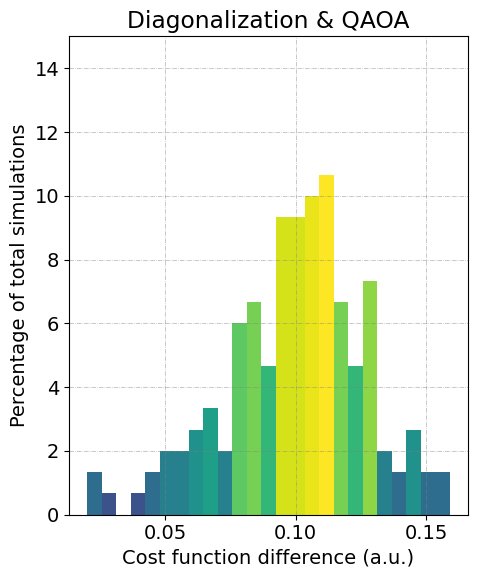

In [105]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True) 
fig.set_size_inches(5,6)
plt.rc('font', size=14)



n_bins = 25
axs.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

N, bins, patches = axs.hist(ediff_12/Repetitions, bins = n_bins, density=True)
 
fracs = ((N**(1 / 2)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
plt.xlabel("Cost function difference (a.u.)")
plt.ylabel("Percentage of total simulations")
plt.ylim(0,15)

plt.title('Diagonalization & QAOA')

for item in patches:
    item.set_height(item.get_height()/sum(N)*100)

Save = "Diagonalization_QAOA"
plt.savefig(Save + ".pdf", dpi=300, bbox_inches='tight')
plt.savefig(Save + ".png", dpi=300, bbox_inches='tight')
plt.show()

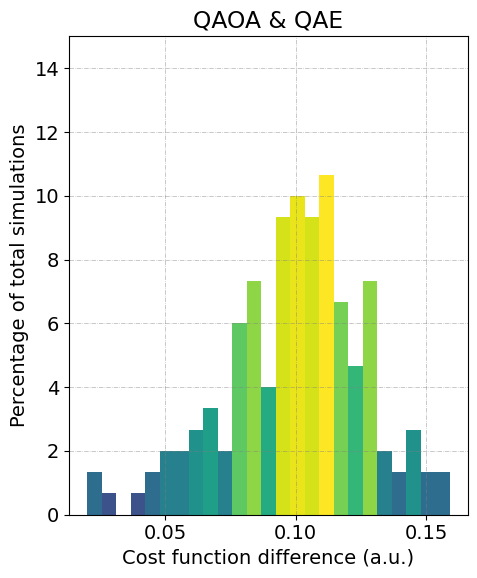

In [107]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True) 
fig.set_size_inches(5,6)
plt.rc('font', size=14)


n_bins = 25
axs.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

N, bins, patches = axs.hist(ediff_23/Repetitions, bins = n_bins, density=True)
 
fracs = ((N**(1 / 2)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
plt.xlabel("Cost function difference (a.u.)")
plt.ylabel("Percentage of total simulations")
plt.ylim(0,15)

plt.title('QAOA & QAE')

for item in patches:
    item.set_height(item.get_height()/sum(N)*100)

Save = "QAOA_QAE"
plt.savefig(Save + ".pdf", dpi=300, bbox_inches='tight')
plt.savefig(Save + ".png", dpi=300, bbox_inches='tight')
plt.show()

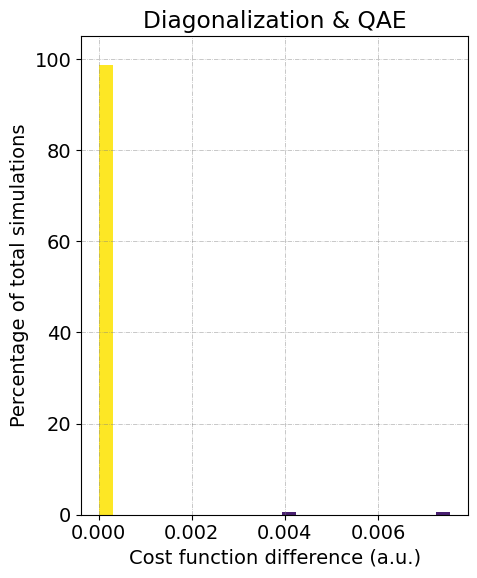

In [109]:
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True) 
fig.set_size_inches(5,6)
plt.rc('font', size=14)


n_bins = 25
axs.grid(color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

N, bins, patches = axs.hist(ediff_13/Repetitions, bins = n_bins, density=True)
 
fracs = ((N**(1 / 2)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
plt.xlabel("Cost function difference (a.u.)")
plt.ylabel("Percentage of total simulations")
plt.ylim(0,105)

plt.title('Diagonalization & QAE')

for item in patches:
    item.set_height(item.get_height()/sum(N)*100)

Save = "Diagonalization_QAE"
plt.savefig(Save + ".pdf", dpi=300, bbox_inches='tight')
plt.savefig(Save + ".png", dpi=300, bbox_inches='tight')
plt.show()

## We determine the rate in which the ground states of the different models coincide: 

In [92]:
print(f"Sucess persentage comparing Diagonalization and QAOA: {round(ncount_12*100,2)}%")
print(f"Sucess persentage comparing QAOA and QAE: {round(ncount_23*100,2)}%")
print(f"Sucess persentage comparing Diagonalization and QAE: {round(ncount_13*100,2)}%")

Sucess persentage comparing Diagonalization and QAOA: 22.67%
Sucess persentage comparing QAOA and QAE: 22.67%
Sucess persentage comparing Diagonalization and QAE: 96.0%


## We plot the average engery deviation with errorbar: 

In [110]:
eavrg_12 = np.sum(ediff_12)/Repetitions
eavrg_23 = np.sum(ediff_23)/Repetitions
eavrg_13 = np.sum(ediff_13)/Repetitions

std_dev_12 = np.std(ediff_12)
std_dev_23 = np.std(ediff_23)
std_dev_13 = np.std(ediff_13)


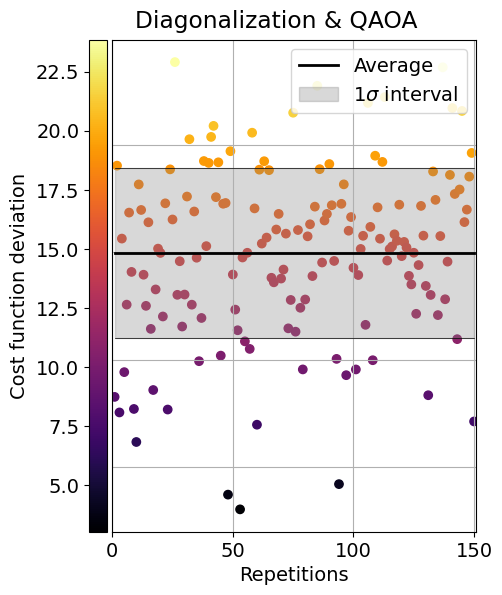

In [141]:
fig = plt.figure() 
fig.set_size_inches(5,6)
plt.rc('font', size=14)
ax = fig.add_subplot(111) 

X = np.linspace(1,Repetitions, Repetitions)
Y = ediff_12

points = np.array([X, Y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(min(Y), max(Y))
lc = LineCollection(segments, cmap='inferno', norm=norm) 
lc.set_array(Y)
lc.set_linewidth(0)
line = ax.add_collection(lc)

divider = make_axes_locatable(ax)
cax = divider.append_axes('left', size='5%', pad=0.05)
fig.colorbar(line, cax=cax, location ="left")

ax.scatter(X, Y, c=Y,cmap='inferno') 
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*eavrg_12, color = "black", linewidth = 2, label = "Average")
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_12-std_dev_12), color = "black", linewidth = 0.5)
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_12+std_dev_12), color = "black", linewidth = 0.5)
ax.fill_between( np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_12-std_dev_12), np.ones(Repetitions)*(eavrg_12+std_dev_12), alpha=0.3, color = "gray", label = r"1$\sigma$ interval")

ax.grid(True)
ax.set_xlabel(f'Repetitions') 
#ax.set_ylim(0,100) 
ax.set_xlim(0,Repetitions+1) 
ax.tick_params(axis='y', colors='white')
ax.set_ylabel(r"Cost function deviation", loc="center", labelpad=35) 
ax.legend(loc="upper right")

fig.suptitle("Diagonalization & QAOA")
fig.subplots_adjust(top=0.93)

Save = "Energies_Diagonalization_QAOA"
plt.savefig(Save + ".pdf", dpi=300, bbox_inches='tight')
plt.savefig(Save + ".png", dpi=300, bbox_inches='tight')
plt.show()
    

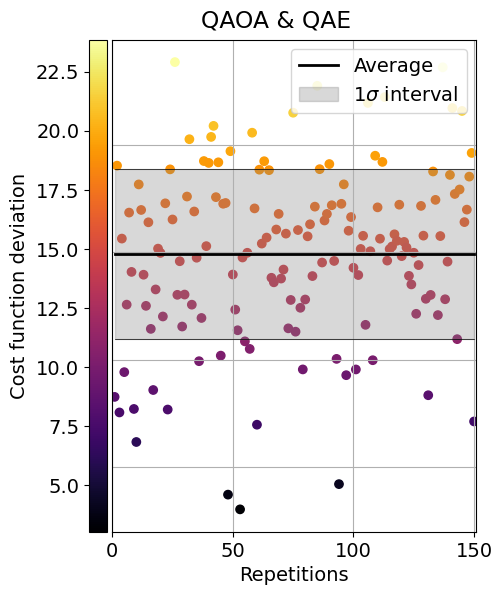

In [140]:
fig = plt.figure() 
fig.set_size_inches(5,6)
plt.rc('font', size=14)
ax = fig.add_subplot(111) 

X = np.linspace(1,Repetitions, Repetitions)
Y = ediff_23

points = np.array([X, Y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(min(Y), max(Y))
lc = LineCollection(segments, cmap='inferno', norm=norm) 
lc.set_array(Y)
lc.set_linewidth(0)
line = ax.add_collection(lc)

divider = make_axes_locatable(ax)
cax = divider.append_axes('left', size='5%', pad=0.05)
fig.colorbar(line, cax=cax, location ="left")

ax.scatter(X, Y, c=Y,cmap='inferno') 
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*eavrg_23, color = "black", linewidth = 2, label = "Average")
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_23-std_dev_23), color = "black", linewidth = 0.5)
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_23+std_dev_23), color = "black", linewidth = 0.5)
ax.fill_between( np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_23-std_dev_23), np.ones(Repetitions)*(eavrg_23+std_dev_23), alpha=0.3, color = "gray", label = r"1$\sigma$ interval")
ax.grid(True)
ax.set_xlabel(f'Repetitions') 
#ax.set_ylim(0,100) 
ax.set_xlim(0,Repetitions+1) 
ax.tick_params(axis='y', colors='white')
ax.set_ylabel(r"Cost function deviation", loc="center", labelpad=35) 
ax.legend(loc="upper right")

fig.suptitle("QAOA & QAE")
fig.subplots_adjust(top=0.93)

Save = "Energies_QAOA_QAE"
plt.savefig(Save + ".pdf", dpi=300, bbox_inches='tight')
plt.savefig(Save + ".png", dpi=300, bbox_inches='tight')
plt.show()

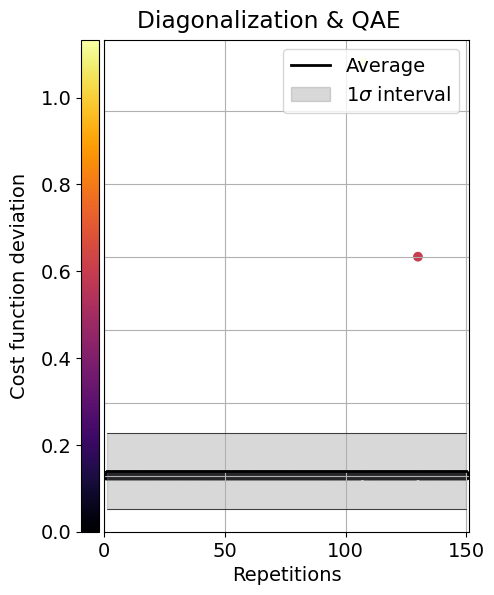

In [139]:
fig = plt.figure() 
fig.set_size_inches(5,6)
plt.rc('font', size=14)
ax = fig.add_subplot(111) 

X = np.linspace(1,Repetitions, Repetitions)
Y = ediff_13

points = np.array([X, Y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(min(Y), max(Y))
lc = LineCollection(segments, cmap='inferno', norm=norm) 
lc.set_array(Y)
lc.set_linewidth(0)
line = ax.add_collection(lc)

divider = make_axes_locatable(ax)
cax = divider.append_axes('left', size='5%', pad=0.05)
fig.colorbar(line, cax=cax, location ="left")

ax.scatter(X, Y, c=Y,cmap='inferno') 
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*eavrg_13, color = "black", linewidth = 2, label = "Average")
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_13-std_dev_13), color = "black", linewidth = 0.5)
ax.plot(np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_13+std_dev_13), color = "black", linewidth = 0.5)
ax.fill_between( np.linspace(1,Repetitions, Repetitions), np.ones(Repetitions)*(eavrg_13-std_dev_13), np.ones(Repetitions)*(eavrg_13+std_dev_13), alpha=0.3, color = "gray", label = r"1$\sigma$ interval")

ax.grid(True)
ax.set_xlabel(f'Repetitions') 
#ax.set_ylim(0,100) 
ax.set_xlim(0,Repetitions+1) 
ax.tick_params(axis='y', colors='white')
ax.set_ylabel(r"Cost function deviation", loc="center", labelpad=25) 
ax.legend(loc="upper right")

fig.suptitle("Diagonalization & QAE")
fig.subplots_adjust(top=0.93)

Save = "Energies_Diagonalization_QAE"
plt.savefig(Save + ".pdf", dpi=300, bbox_inches='tight')
plt.savefig(Save + ".png", dpi=300, bbox_inches='tight')
plt.show()

### Research questions

1. For the annealing schedules calculated, do any of the resulting spectral schedules fulfill the adiabatic theorem?
2. By this point you will have obtained two energies, one from the software challenge (QAOA) and one from the annealing schedule above. Argue their relation.
3.  If you have made it here, you have problaly seen the difficulties of solving small instances. Can you propose ways to scale these procedures to more qubits? Some techniques for finding the gap along the annealing process can be found in [1], [2], [3] and [4]. Can you implement a simulation from one of these papers? Research and propose better techniques to find the flux schedule for a given Ising schedule with a greater amount of qubits.  

## Bibliography

[1] Adiabatic Spectroscopy and a Variational Quantum Adiabatic Algorithm: https://arxiv.org/abs/2103.01226

[2] Direct estimation of the energy gap between the ground state and excited state with quantum annealing: https://arxiv.org/abs/2007.10561

[3] Simulating quantum circuits by adiabatic computation: improved spectral gap bounds: https://arxiv.org/abs/1906.05233

[4] Spectroscopy on two coupled flux qubits: https://arxiv.org/abs/cond-mat/0308192

